# Wykrywanie fałszywych banknotów z użyciem ML

In [ ]:
# Import wymaganych bibliotek
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

### Mateusz Medoń

In [ ]:
# Pobierz najnowszą wersję zbioru danych
path = kagglehub.dataset_download("alexandrepetit881234/fake-bills")

100%|██████████| 17.1k/17.1k [00:00<00:00, 25.7MB/s]

Extracting files...


In [ ]:
# Wczytaj dane do ramki danych (DataFrame) przy użyciu pandas
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]), header = 0, delimiter = ";")

# Wyświetl ramkę danych
display(df)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
# Wyświetl podstawowe statystyki opisowe dla danych
display(df.describe())

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [ ]:
# Sprawdź, czy w zbiorze danych występują wartości NaN (brakujące dane)
print(df.isna().sum())

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


In [ ]:
# Wyświetl wiersze, w których występują brakujące dane w kolumnie "margin_low"
display(df[df["margin_low"].isna() == True])

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [ ]:
# Oblicz średnią wartość dla kolumny "margin_low"
mean_value = df["margin_low"].mean()

# Wypełnij brakujące wartości w kolumnie "margin_low" średnią wartością
df["margin_low"] = df["margin_low"].fillna(mean_value)

# Zakoduj kolumnę docelową "is_genuine" jako zmienną binarną
df['is_genuine'] = df['is_genuine'].astype(int)

# Zdefiniuj cechy (X) i zmienną docelową (y)
X = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y = df['is_genuine']

# Podziel dane na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Mateusz Medoń

### Aleksandra Czuszek (Różańska)

#### K-Nearest Neighbors (KNN)

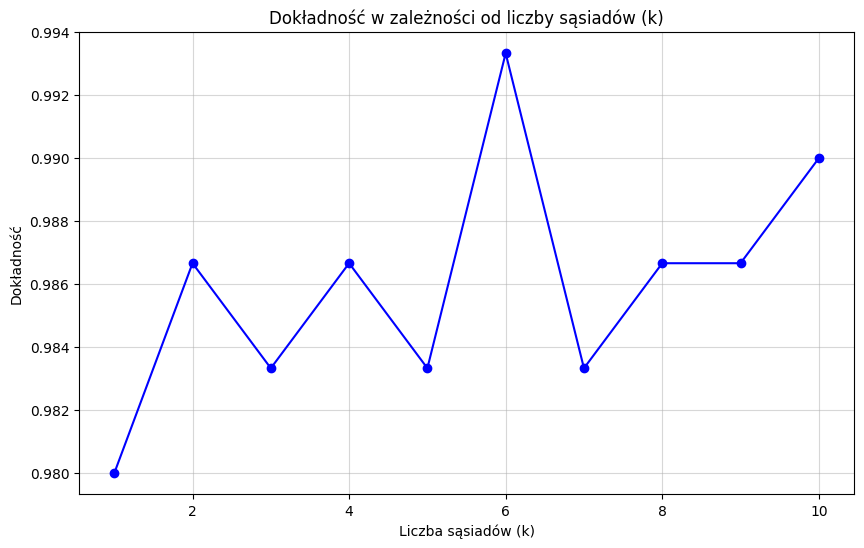

In [ ]:
# Wizualizacja dokładności dla różnych k
accuracies = []
k_values = range(1, 11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Rysowanie wykresu
plt.figure(figsize = (10, 6))
plt.plot(k_values, accuracies, marker = 'o', linestyle = '-', color = 'b')
plt.title("Dokładność w zależności od liczby sąsiadów (k)")
plt.xlabel("Liczba sąsiadów (k)")
plt.ylabel("Dokładność")
plt.grid(alpha = 0.5)
plt.show()

In [ ]:
# Najlepsza dokładność
print(max(accuracies))

# Musimy dodać 1 bo indexy w Python liczy się od zera
k = accuracies.index(max(accuracies)) + 1
print(k)

0.9933333333333333
6


In [ ]:
### K-Nearest Neighbors (KNN) ###
print("\nAlgorytm K-Nearest Neighbors (KNN):")

# Inicjalizacja modelu KNN
model_knn = KNeighborsClassifier(n_neighbors = k)
model_knn.fit(X_train, y_train)

# Predykcja dla zbioru testowego (KNN)
y_pred_knn = model_knn.predict(X_test)
y_pred_proba_knn = model_knn.predict_proba(X_test)[:, 1]

# Ocena modelu (KNN)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Dokładność (KNN, k={k}): {accuracy_knn:.2f}")
print("\nRaport klasyfikacji (KNN):\n", classification_report(y_test, y_pred_knn))
print("\nMacierz pomyłek (KNN):\n", confusion_matrix(y_test, y_pred_knn))

# Krzywa ROC (KNN)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)


Algorytm K-Nearest Neighbors (KNN):
Dokładność (KNN, k=10): 0.99

Raport klasyfikacji (KNN):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Macierz pomyłek (KNN):
 [[107   3]
 [  0 190]]


### Aleksandra Czuszek (Różańska)

### Szymon Czuszek

#### Regresja logistyczna

In [ ]:
### Regresja logistyczna ###
print("Regresja logistyczna:")
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Predykcja dla zbioru testowego (Regresja logistyczna)
y_pred_lr = model_lr.predict(X_test)
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]

# Ocena modelu (Regresja logistyczna)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Dokładność (Regresja logistyczna): {accuracy_lr:.2f}")
print("\nRaport klasyfikacji (Regresja logistyczna):\n", classification_report(y_test, y_pred_lr))
print("\nMacierz pomyłek (Regresja logistyczna):\n", confusion_matrix(y_test, y_pred_lr))

# Krzywa ROC (Regresja logistyczna)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

Regresja logistyczna:
Dokładność (Regresja logistyczna): 0.99

Raport klasyfikacji (Regresja logistyczna):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Macierz pomyłek (Regresja logistyczna):
 [[108   2]
 [  0 190]]


#### Wizualizacja krzywych ROC dla obu modeli

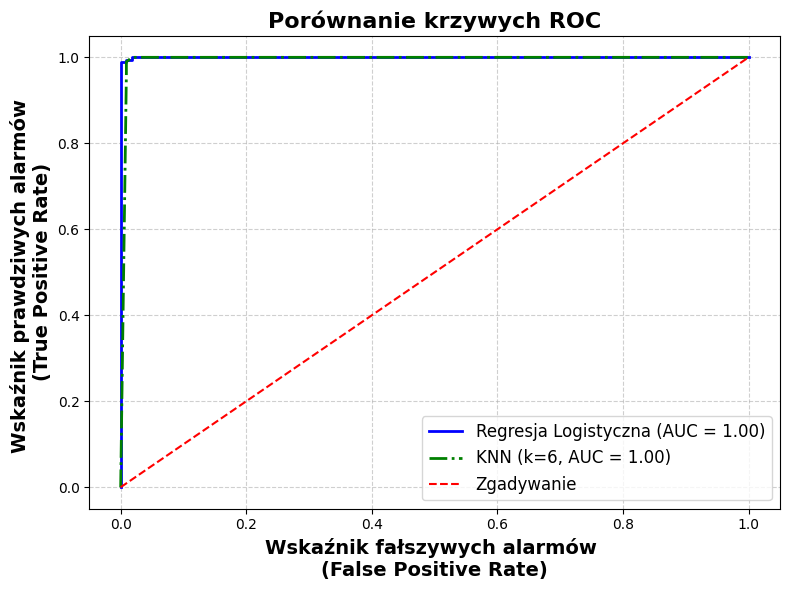

In [ ]:
### Wizualizacja krzywych ROC dla obu modeli ###
plt.figure(figsize = (8, 6))

# Regresja logistyczna
plt.plot(fpr_lr,
         tpr_lr,
         color = 'blue',
         lw = 2,
         label = f'Regresja Logistyczna (AUC = {roc_auc_lr:.2f})'
        )

# KNN
plt.plot(fpr_knn,
         tpr_knn,
         color = 'green',
         lw = 2,
         linestyle = '-.',
         label = f'KNN (k={k}, AUC = {roc_auc_knn:.2f})'
        )

# Linia zgadywania
plt.plot([0, 1],
         [0, 1],
         color = 'red',
         linestyle = '--',
         label = 'Zgadywanie'
        )

# Dostosowanie wykresu
plt.xlabel('Wskaźnik fałszywych alarmów \n(False Positive Rate)',
           fontsize = 14,
           fontweight = 'bold'
          )

plt.ylabel('Wskaźnik prawdziwych alarmów \n(True Positive Rate)',
           fontsize = 14,
           fontweight = 'bold'
          )

plt.title('Porównanie krzywych ROC',
          fontsize = 16,
          fontweight = 'bold'
         )

plt.legend(loc = "lower right",
           fontsize = 12
          )

plt.grid(True,
         linestyle = '--',
         alpha = 0.6
        )

plt.tight_layout()

plt.show()

### Szymon Czuszek

### Mateusz Medoń

#### PCA

In [ ]:
# Redukcja wymiarów za pomocą PCA
pca = PCA(n_components = 2)  # Redukcja do 2 wymiarów
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Trening modelu k-NN
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_pca, y_train)

# Predykcja
y_pred = knn.predict(X_test_pca)

# Wyświetlenie wyników
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[108   2]
 [  3 187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       110
           1       0.99      0.98      0.99       190

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Accuracy: 0.9833333333333333


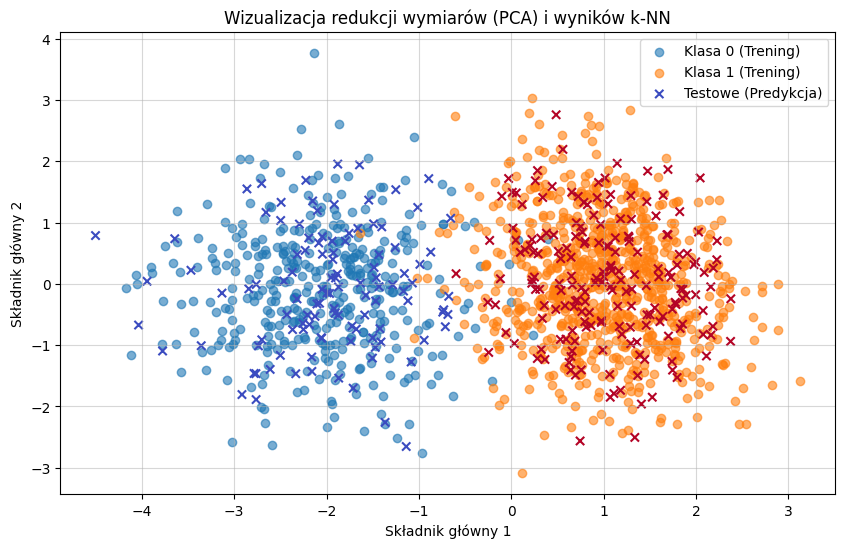

In [ ]:
# Wizualizacja danych po redukcji PCA
plt.figure(figsize = (10, 6))

# Podział na klasy dla wykresu
for i, label in enumerate([0, 1]):
    plt.scatter(X_train_pca[y_train == label, 0],
                X_train_pca[y_train == label, 1],
                label=f"Klasa {label} (Trening)", alpha = 0.6)

# Oznaczenie punktów testowych
plt.scatter(X_test_pca[:, 0],
            X_test_pca[:, 1],
            c = y_pred,
            marker = 'x',
            label = "Testowe (Predykcja)",
            cmap = 'coolwarm'
           )

plt.title("Wizualizacja redukcji wymiarów (PCA) i wyników k-NN")
plt.xlabel("Składnik główny 1")
plt.ylabel("Składnik główny 2")
plt.legend()
plt.grid(alpha = 0.5)
plt.show()

### Mateusz Medoń

## Podział pracy



1.   Aleksandra Czuszek (Różańska)
  *   Implementacja algorytmu KNN
  *   Ocena algorytmu KNN
  *   Dobór najlepszego k do algorytmu KNN
  *   Wizualizacja wyników doboru najlepszego k do Algorytmu KNN
2.   Szymon Czuszek
  *   Implementacja algorytmu regresji logistycznej
  *   Ocena algorytmu regresji logistycznej
  *   Analiza porównawcza algorytmów (KNN vs. regresja logistyczna)
  *   Analiza i wizualizacja krzywych ROC.
3.   Mateusz Medoń
  *   Przygotowanie, oczyszczanie oraz normalizacja danych
  *   Podział na zbiór treningowy i testowy
  *   PCA
  *   Wizualizacja algorytmu KNN na bazie PCA


